# Import Library

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [11]:
df = pd.read_csv('/content/cybersecurity_attacks.csv')

ParserError: ignored

In [ ]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

In [103]:
df.dtypes

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

<ipython-input-20-ef4f6eb6e693>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Greens");


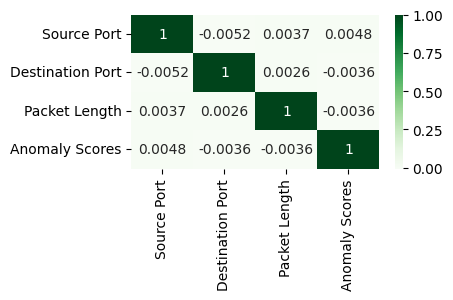

In [ ]:
plt.figure(figsize=(4,2))
sns.heatmap(df.corr(), annot=True, cmap="Greens");

In [ ]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [98]:
df['Proxy Information'].fillna('Tidak diketahui', inplace=True)
df['Malware Indicators'].fillna('undifine', inplace=True)
df['Firewall Logs'].fillna('undifine', inplace=True)
df['Alerts/Warnings'].fillna('undifine', inplace=True)
df['IDS/IPS Alerts'].fillna('undifine', inplace=True)

In [99]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [ ]:
print(df['Anomaly Scores'].describe())

count    40000.000000
mean        50.113473
std         28.853598
min          0.000000
25%         25.150000
50%         50.345000
75%         75.030000
max        100.000000
Name: Anomaly Scores, dtype: float64


<Axes: >

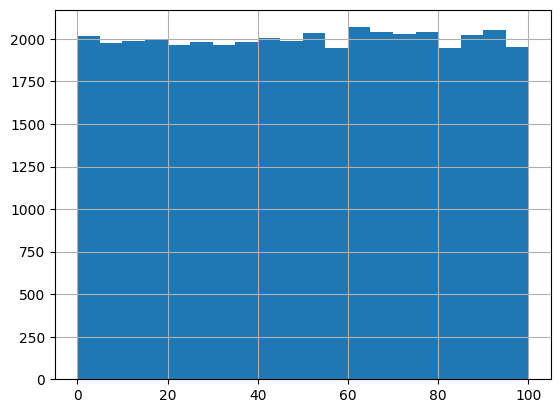

In [ ]:
df['Anomaly Scores'].hist(bins=20)

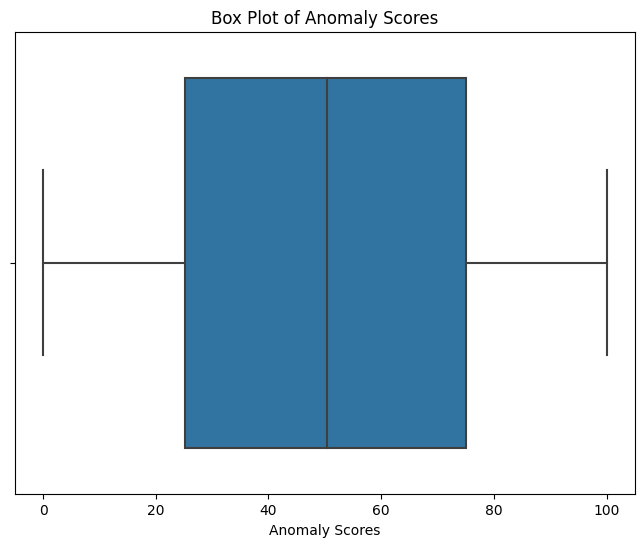

In [ ]:
# Box plot 'Anomaly Scores'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Anomaly Scores'])
plt.title('Box Plot of Anomaly Scores')
plt.show()

In [ ]:
Q1 = df['Anomaly Scores'].quantile(0.25)
Q3 = df['Anomaly Scores'].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outliers
outliers = df[(df['Anomaly Scores'] < (Q1 - 1.5 * IQR)) | (df['Anomaly Scores'] > (Q3 + 1.5 * IQR))]
print("Number of outliers:", len(outliers))

Number of outliers: 0


<ipython-input-55-197468dc56e9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Attack Type', y='Anomaly Scores', data=df, ci=None)


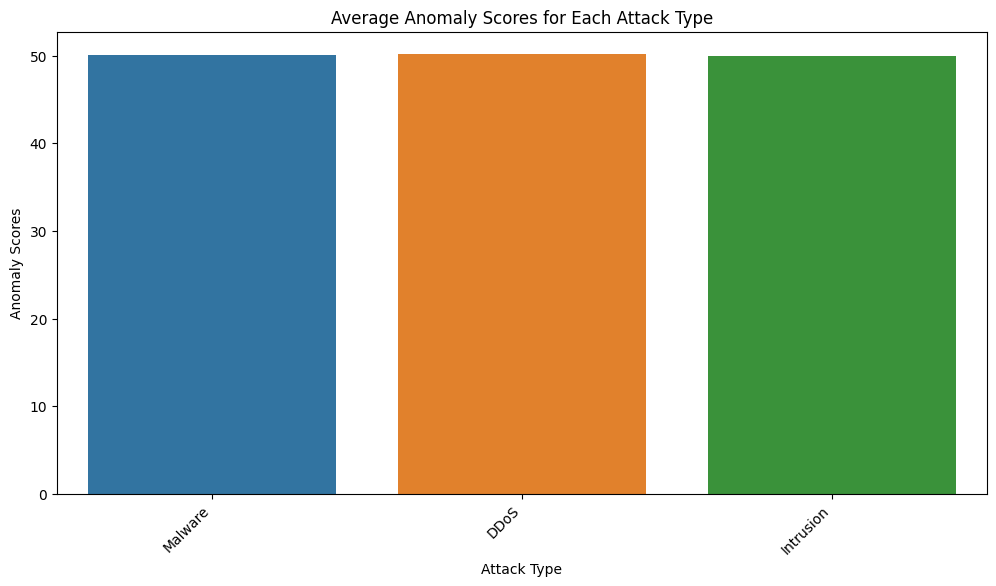

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Attack Type', y='Anomaly Scores', data=df, ci=None)
plt.title('Average Anomaly Scores for Each Attack Type')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# membuat fungsi untuk grouped barchart/clutered barchart
def grouped_barchart(column):
  HasilDiagnosis = diabetes_dataset.groupby(['HasilDiagnosis', column]).count()['Umur'].reset_index()

  g = sns.catplot(
      data = HasilDiagnosis, kind = "bar",
      x = "HasilDiagnosis", y = "Umur", hue = column,
      palette = "dark" , height = 6
  )

In [104]:
df[['Anomaly Scores', 'Attack Type']]

,Anomaly Scores,Attack Type
0,28.67,Malware
1,51.50,Malware
2,87.42,DDoS
3,15.79,Malware
4,0.52,DDoS
...,...,...
39995,39.28,DDoS
39996,27.25,DDoS
39997,31.01,DDoS
39998,97.85,Malware


from matplotlib import pyplot as plt
_df_8['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Anomaly Scores'].plot(kind='hist', bins=20, title='Anomaly Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Attack Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='index', y='Anomaly Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Anomaly Scores']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attack Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attack Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Anomaly Scores')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attack Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attack Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Anomaly Scores'].plot(kind='line', figsize=(8, 4), title='Anomaly Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Attack Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Attack Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Attack Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Anomaly Scores', y='Attack Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

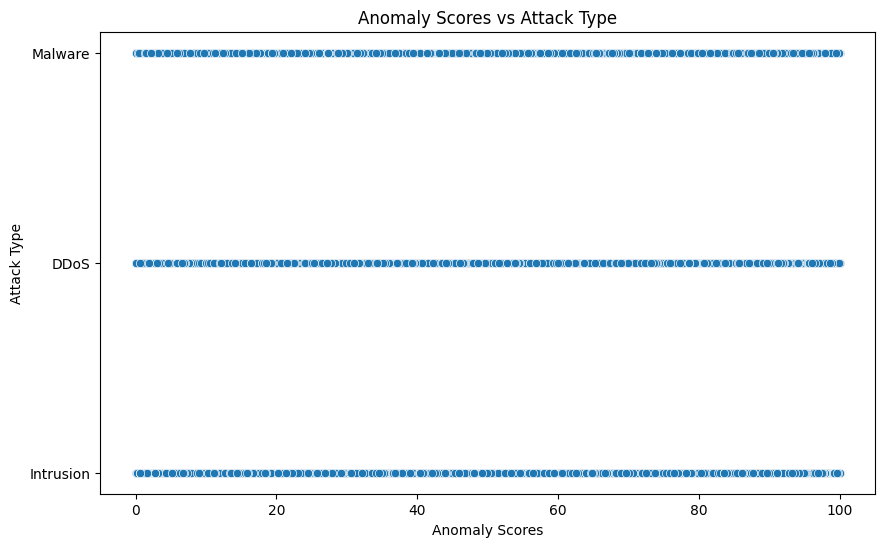

In [ ]:
# Scatter plot 'Anomaly Scores' vs 'Attack Type'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anomaly Scores', y='Attack Type', data=df)
plt.title('Anomaly Scores vs Attack Type')
plt.show()


In [ ]:
# Korelasi antara 'Anomaly Scores' dan 'Attack Type'
correlation, p_value = spearmanr(df['Anomaly Scores'], df['Attack Type'])
print("Spearman Correlation:", correlation)
print("P-value:", p_value)

Spearman Correlation: -0.0015523431479185041
P-value: 0.7562118464733292


In [85]:
# Korelasi 'Anomaly Scores' dengan 'Source Port'
correlation = df['Anomaly Scores'].corr(df['Source Port'])
print("Correlation with Source Port:", correlation)

Correlation with Source Port: 0.00482601541087104


<ipython-input-91-71b859f02836>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Attack Type', y='Destination Port', data=df, ci=None)


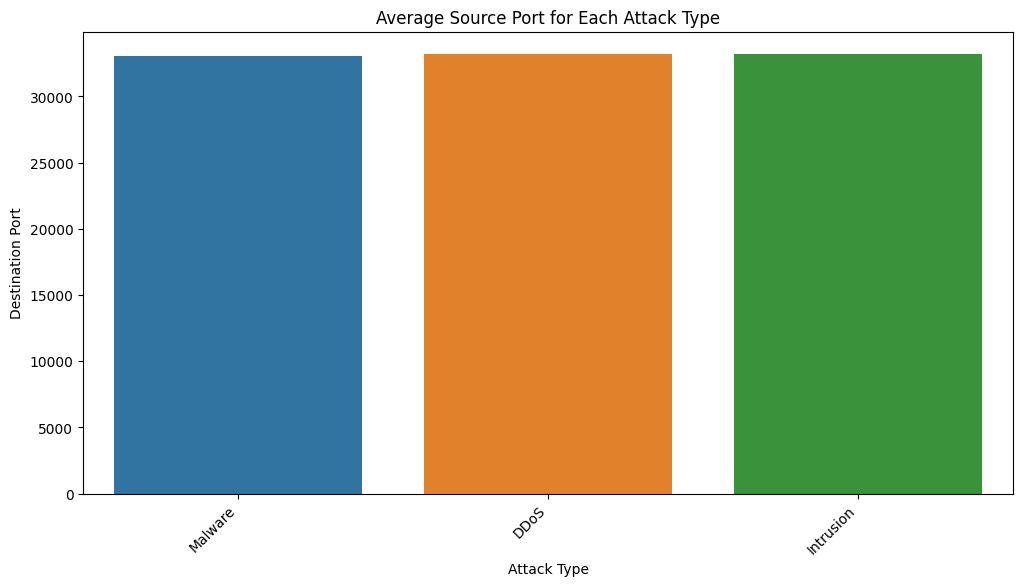

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Attack Type', y='Destination Port', data=df, ci=None)
plt.title('Average Source Port for Each Attack Type')
plt.xticks(rotation=45, ha='right')
plt.show()

In [4]:
# Matrix korelasi
correlation_matrix = df[df['Anomaly Scores', 'Attack Type']].corr()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Anomaly Scores vs Attack Type')
plt.show()

NameError: ignored

### Machine Learning

Pemisahan data

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Pilih fiitur dan normalisasi data
X = df[['Anomaly Scores', 'Source Port']]
X_normalized = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# pemisahan data
X_train, X_test = train_test_split(X_normalized, test_size=0.2, random_state=42)